In [10]:
from __future__ import division
import sys
import argparse
import numpy as np, matplotlib.pyplot as plt
import pretty_midi
import librosa, librosa.display
import itertools
from IPython.display import Audio,display

%matplotlib inline
#plt.rcParams['figure.figsize'] = (14,4)

In [11]:
#parse midi to pretty midi object
midi_fn = '../data/mid/Bounce.mid'
sr = 22050
bounce = pretty_midi.PrettyMIDI(midi_fn)

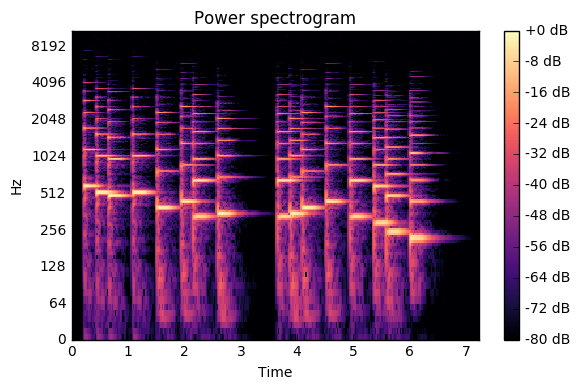

In [13]:
#synthesize to audio, listen, and compute, view spectrogram
y = bounce.fluidsynth(fs=sr)
display(Audio(bounce_audio,rate=sr))
D = librosa.stft(y)
librosa.display.specshow(librosa.amplitude_to_db(D,
                                                 ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

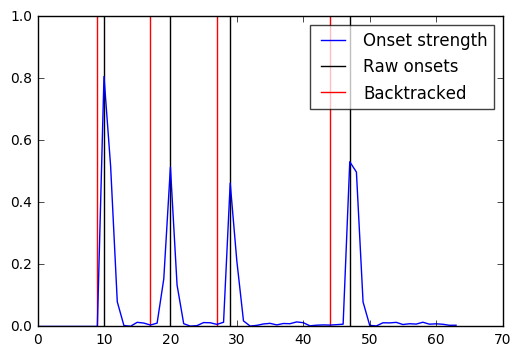

In [22]:
#onsets
oenv = librosa.onset.onset_strength(y=y, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv,
                                        backtrack=False)
# Backtrack the events using the onset envelope
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
plt.figure()
plt.plot(oenv[:64], label='Onset strength')
plt.vlines(onset_raw[:4], 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt[:4], 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.show()

In [27]:
#chart onsets vs pm note on events
noteons = []
for instrument in bounce.instruments:
    for note in instrument.notes:
        #print(note)
        noteons.append(note.start)
print(noteons)

[0.21428550000000002, 0.42857100000000004, 0.64285650000000005, 1.0714275000000002, 1.4999985000000002, 1.9285695000000003, 2.1428550000000004, 2.5714260000000002, 3.6428535000000006, 3.8571390000000005, 4.0714245000000009, 4.4999955000000007, 4.9285665000000005, 5.3571375000000003, 5.5714230000000011, 5.9999940000000009]


In [32]:
onset_bt_times = librosa.frames_to_time(onset_bt)
print(onset_bt_times)

[ 0.20897959  0.39473923  0.62693878  1.021678    1.43963719  1.85759637
  2.11301587  2.57741497  3.62231293  3.83129252  4.04027211  4.48145125
  4.92263039  5.34058957  5.54956916  5.9907483 ]


In [33]:
onset_raw_times = librosa.frames_to_time(onset_raw)
print(onset_raw_times)

[ 0.23219955  0.46439909  0.67337868  1.09133787  1.53251701  1.95047619
  2.15945578  2.60063492  3.66875283  3.90095238  4.10993197  4.52789116
  4.94585034  5.38702948  5.59600907  6.01396825]


In [34]:
avg_onset_times = (onset_bt_times + onset_raw_times)/2
print(avg_onset_times)

[ 0.22058957  0.42956916  0.65015873  1.05650794  1.4860771   1.90403628
  2.13623583  2.58902494  3.64553288  3.86612245  4.07510204  4.5046712
  4.93424036  5.36380952  5.57278912  6.00235828]


In [40]:
(onset_raw_times - noteons)*sr

array([ 395.004725,  790.00945 ,  673.014175,  439.023625,  717.033075,
        483.042525,  366.04725 ,  644.0567  ,  571.080325,  966.08505 ,
        849.089775,  615.099225,  381.108675,  659.118125,  542.12285 ,
        308.1323  ])